In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import pandas_profiling as pdp
import japanize_matplotlib

In [5]:
train=pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')

In [13]:
display(train[:4])
display(test[:4])
print(train.shape)
print(test.shape)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


(891, 12)
(418, 11)


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
df_full=pd.concat([train,test],axis=0,sort=False)
print(df_full.shape)
df_full.describe()

(1309, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [24]:
display(df_full.describe(percentiles=[i*0.1 for i in range(1,10)]))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
10%,131.800000,0.000000,1.000000,14.000000,0.000000,0.000000,7.567500
20%,262.600000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,393.400000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,524.200000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
60%,785.800000,0.000000,3.000000,31.000000,0.000000,0.000000,21.679200


In [26]:
df_full.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [33]:
pdp.ProfileReport(train)

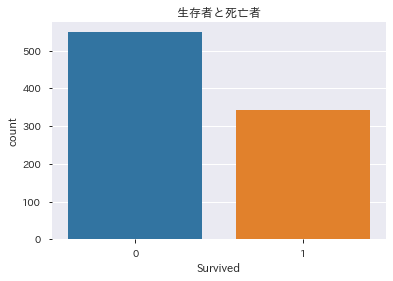

0    549
1    342
Name: Survived, dtype: int64

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [42]:
sns.countplot(x='Survived',data=train)
plt.title('生存者と死亡者')
plt.show()
display(train['Survived'].value_counts())
display(train['Survived'].value_counts()/len(train['Survived']))


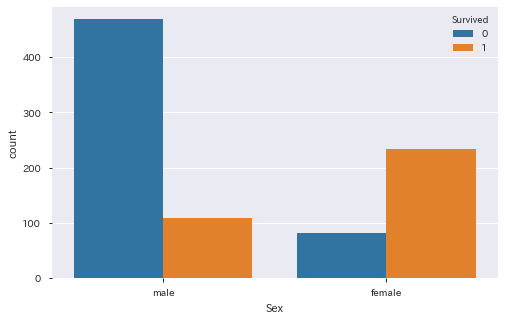

Survived,0,1
Sex,,
female,81,233
male,468,109


Survived,0,1
Sex,,
female,0.090909,0.261504
male,0.525253,0.122334


In [53]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex',hue='Survived',data=train)
plt.show()
display(pd.crosstab(train['Sex'],train['Survived']))
display(pd.crosstab(train['Sex'],train['Survived'],normalize=True))

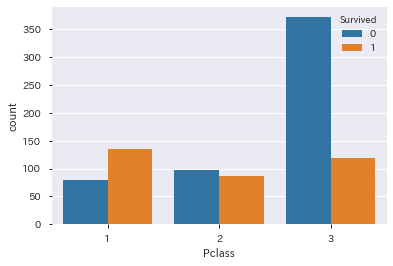

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Survived,0,1
Pclass,,
1,0.089787,0.152637
2,0.108866,0.097643
3,0.417508,0.133558


In [55]:
sns.countplot(x='Pclass',hue='Survived',data=train)
plt.show()

display(pd.crosstab(train['Pclass'],train['Survived']))
display(pd.crosstab(train['Pclass'],train['Survived'],normalize=True))

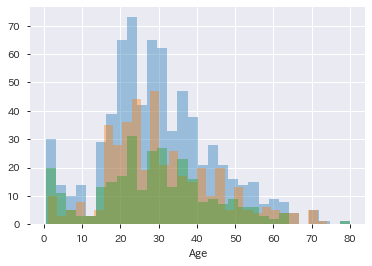

Survived,0,1
CategoricalAge,,
"(0.34, 10.368]",26,38
"(10.368, 20.315]",71,44
"(20.315, 30.263]",146,84
"(30.263, 40.21]",86,69
"(40.21, 50.158]",53,33
"(50.158, 60.105]",25,17
"(60.105, 70.052]",13,4
"(70.052, 80.0]",4,1


Survived,0,1
CategoricalAge,,
"(0.34, 10.368]",0.406250,0.593750
"(10.368, 20.315]",0.617391,0.382609
"(20.315, 30.263]",0.634783,0.365217
"(30.263, 40.21]",0.554839,0.445161
"(40.21, 50.158]",0.616279,0.383721
"(50.158, 60.105]",0.595238,0.404762
"(60.105, 70.052]",0.764706,0.235294
"(70.052, 80.0]",0.800000,0.200000


In [61]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30,label='全体')

sns.distplot(train[train['Survived']==0]['Age'].dropna(),kde=False,bins=30,label='die')

sns.distplot(train[train['Survived']==1]['Age'].dropna(),kde=False,bins=30,label='survived')

plt.show()

train['CategoricalAge']=pd.cut(train['Age'],8)
display(pd.crosstab(train['CategoricalAge'],train['Survived']))

display(pd.crosstab(train['CategoricalAge'],train['Survived'],normalize='index'))

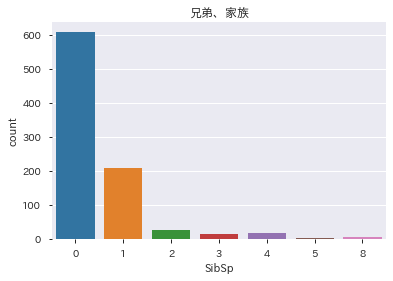

In [63]:
sns.countplot(x='SibSp',data=train)
plt.title('兄弟、家族')
plt.show()

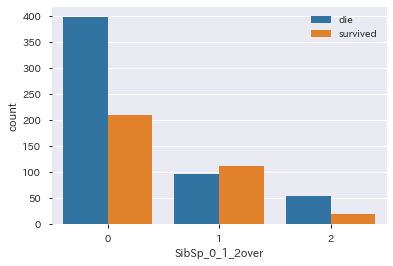

Survived,0,1
SibSp_0_1_2over,,
0,398,210
1,97,112
2,54,20


Survived,0,1
SibSp_0_1_2over,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.729730,0.270270


In [68]:
train['SibSp_0_1_2over']=[i if i<=1 else 2 for i in train['SibSp']]

sns.countplot(x='SibSp_0_1_2over',hue='Survived',data=train)
plt.legend(['die','survived'])
plt.show()

display(pd.crosstab(train['SibSp_0_1_2over'],train['Survived']))

display(pd.crosstab(train['SibSp_0_1_2over'],train['Survived'],normalize='index'))

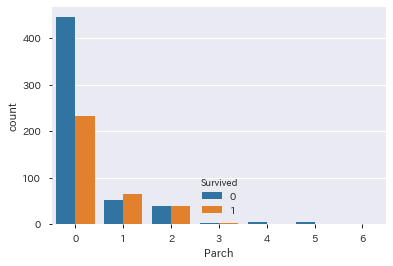

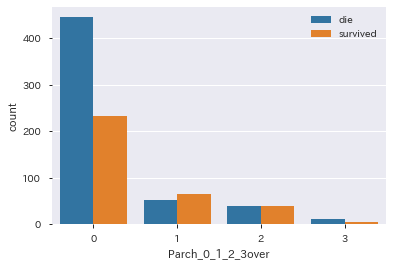

Survived,0,1
Parch_0_1_2_3over,,
0,445,233
1,53,65
2,40,40
3,11,4


Survived,0,1
Parch_0_1_2_3over,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.733333,0.266667


In [72]:
sns.countplot(x='Parch',hue='Survived',data=train)
plt.show()

train['Parch_0_1_2_3over']=[i if i<=2 else 3 for i in train['Parch']]

sns.countplot(x='Parch_0_1_2_3over',hue='Survived',data=train)
plt.legend(['die','survived'])
plt.show()

display(pd.crosstab(train['Parch_0_1_2_3over'],train['Survived']))

display(pd.crosstab(train['Parch_0_1_2_3over'],train['Survived'],normalize='index'))

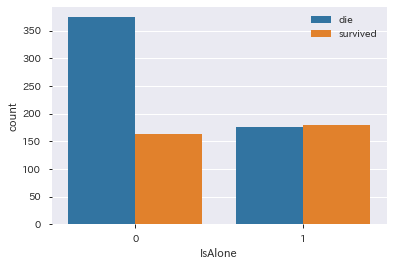

Survived,0,1
IsAlone,,
0,374,163
1,175,179


Survived,0,1
IsAlone,,
0,0.696462,0.303538
1,0.494350,0.505650


In [75]:
train['FamilySize']=train['SibSp']+train['Parch']+1

train['IsAlone']=0
train.loc[train['FamilySize']>=2,'IsAlone']=1

sns.countplot(x='IsAlone',hue='Survived',data=train)
plt.legend(['die','survived'])
plt.show()

display(pd.crosstab(train['IsAlone'],train['Survived']))

display(pd.crosstab(train['IsAlone'],train['Survived'],normalize='index'))

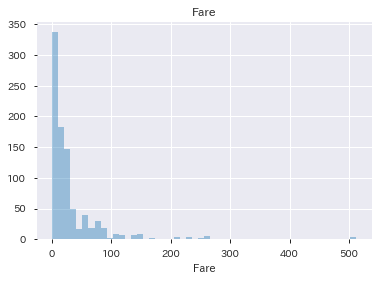

In [77]:
sns.distplot(train['Fare'].dropna(),kde=False,hist=True)
plt.title('Fare')
plt.show()

In [82]:
train['CategoricalFare']=pd.qcut(train['Fare'],4)
train[['CategoricalFare','Survived']].groupby(['CategoricalFare'],as_index=False).mean()

display(pd.crosstab(train['CategoricalFare'],train['Survived']))

display(pd.crosstab(train['CategoricalFare'],train['Survived'],normalize='index'))

Survived,0,1
CategoricalFare,,
"(-0.001, 7.91]",179,44
"(7.91, 14.454]",156,68
"(14.454, 31.0]",121,101
"(31.0, 512.329]",93,129


Survived,0,1
CategoricalFare,,
"(-0.001, 7.91]",0.802691,0.197309
"(7.91, 14.454]",0.696429,0.303571
"(14.454, 31.0]",0.545045,0.454955
"(31.0, 512.329]",0.418919,0.581081


In [114]:
train['Title']=train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train.groupby('Title').mean()['Age']

test['Title']=test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [113]:
def title_to_num(title):
    if title=='Master':
        return 1
    
    elif title=='Mrs':
        return 2
    
    elif title=='Miss':
        return 3
    
    elif title=='Mr':
        return 4
    
    else:
        return 5


In [115]:
train['Title_num']=[title_to_num(i) for i in train['Title']]
test['Title_num']=[title_to_num(i) for i in test['Title']]